# Sentiment Analysis: IMDB Movie Reviews

In [99]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('IMDB Dataset.csv')
print("Total reviews in df: ", df.shape)
df.head()

Total reviews in df:  (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


## EDA

In [71]:
# No null values in dataset.
df['review'].isnull().sum()

0

In [72]:
print("Total Number of positive reviews in data: ", df[df['sentiment']==1].shape[0])
print("Total Number of negative reviews in data: ", df[df['sentiment']==0].shape[0])

Total Number of positive reviews in data:  25000
Total Number of negative reviews in data:  25000


__Observation:__ Data contains equal amount of positive and negative reviews.

In [73]:
# sample positive movie review
df[df['sentiment']==1].sample(n=1)['review'].iloc[0]

"Now I like Victor Herbert. And I like Mary Martin and Allan Jones. But it would have been nice to see a real biography of Victor Herbert. Walter Connolly as Herbert does have a decent resemblance to him in his latter years<br /><br />Jones and Martin sing beautifully though. The Herbert music is just there to adorn the plot line concerning these two musical performers. Jones's John Ramsay is a frail character, very similar to Gaylord Ravenal in Showboat who Jones also played.<br /><br />As for Mary Martin, it's a mystery why she never had a good Hollywood career. She did films with Bing Crosby and Dick Powell as well as this one. She performed well, but movie audiences didn't take to her. The best musical moment in the film is Jones and Martin in a duet of Thine Alone. The recordings I have of the song are individual and it was written as a duet. There's also a pleasant scene with Jones and Martin riding bicycles swapping Herbert songs as they ride.<br /><br />The real Victor Herbert 

In [74]:
# sample negative review
df[df['sentiment']==0].sample(n=1)['review'].iloc[0]

'This norwegian movie is so crap, the actors can not act cause they seems to be reading from a book and the story is so (wannabe) hollywood..the only actor who did a ok job was Haavard Lilleheie..3/10 If you want a really good norwegian movie watch Buddy, great actors and a feelgood story 9/10'

In [75]:
# word_count in reviews
word_counts = df['review'].apply(lambda x: len(x.split()))

word_counts.describe()

count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review, dtype: float64

In [76]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


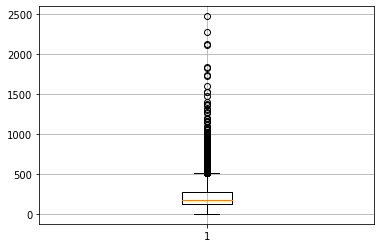

In [77]:
plt.boxplot(word_counts.values)
plt.grid(True)
plt.show()

__Observations:__  Most of the reviews have words 200-350.

## Data processing

In [145]:
import re
import nltk
nltk.download('punkt') # At first you have to download these nltk packages.
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english') # defining stop_words
stop_words.remove('not') # removing not from the stop_words list as it contains value in negative movies
lemmatizer = WordNetLemmatizer()

def data_preprocessing(review):
    
  # data cleaning
    review = re.sub(re.compile('<.*?>'), '', review) #removing html tags
    review =  re.sub('[^A-Za-z0-9]+', ' ', review) #taking only words
  
  # lowercase
    review = review.lower()
  
  # tokenization
    tokens = nltk.word_tokenize(review) # converts review to tokens
  
  # stop_words removal
    review = [word for word in tokens if word not in stop_words] #removing stop words
  
  # lemmatization
    review = [lemmatizer.lemmatize(word) for word in review]
  
  # join words in preprocessed review
    review = ' '.join(review)
    return review

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chenw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chenw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chenw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\chenw\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [146]:
df['preprocessed_review'] = df['review'].apply(lambda review: data_preprocessing(review))
df.head()

,review,sentiment,preprocessed_review
0,One of the other reviewers has mentioned that ...,1,one reviewer mentioned watching 1 oz episode h...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visually stunnin...


#### Positive Reviews Wordcloud

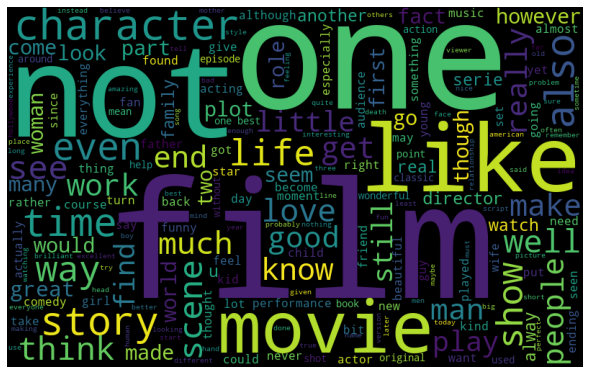

In [80]:
import wordcloud
from wordcloud import WordCloud

words_list = df[df['sentiment']==1]['preprocessed_review'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=800, height = 500,            
                  stopwords=stop_words).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Negative Reviews Wordcloud

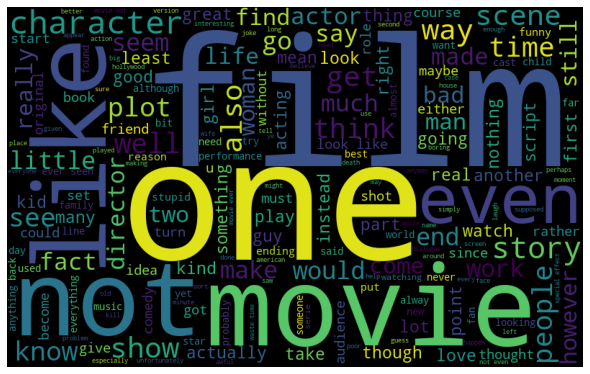

In [81]:
words_list = df[df['sentiment']==0]['preprocessed_review'].unique().tolist()
neg_words = " ".join(words_list)

neg_wordcloud =  WordCloud(
                  width=800, height = 500,            
                  stopwords=stop_words).generate(neg_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report


In [83]:
df.head()

,review,sentiment,preprocessed_review
0,One of the other reviewers has mentioned that ...,1,one reviewer mentioned watching 1 oz episode h...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visually stunnin...


In [84]:
tfidf = TfidfVectorizer()

In [85]:
X = df['preprocessed_review']
y = df['sentiment']

X = tfidf.fit_transform(X)

In [86]:
X

<50000x93707 sparse matrix of type '<class 'numpy.float64'>'
	with 4804625 stored elements in Compressed Sparse Row format>

In [217]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size =0.8, random_state=0, shuffle = False)

# Support Vector Classifier

In [218]:
clf = LinearSVC()
clf.fit(X_train, y_train)


LinearSVC()

In [219]:
y_pred = clf.predict(X_test)

In [220]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87     20028
           1       0.87      0.88      0.88     19972

    accuracy                           0.88     40000
   macro avg       0.88      0.88      0.88     40000
weighted avg       0.88      0.88      0.88     40000



# Logistic Regression Classifier

In [221]:
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import LogisticRegressionCV

lrclf = LogisticRegressionCV(cv=5,
                           scoring='accuracy',
                           random_state=0,
                           n_jobs=-1,
                           verbose=3,
                           max_iter=300).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


In [222]:
# test accuracy
lrclf.score(X_test, y_test)

0.879625

In [223]:
y_pre = lrclf.predict(X_test)
y_pre

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [224]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     20028
           1       0.87      0.89      0.88     19972

    accuracy                           0.88     40000
   macro avg       0.88      0.88      0.88     40000
weighted avg       0.88      0.88      0.88     40000



#### Testing the classifier on custom review

In [225]:
x = 'this movie is really good. Thanks a lot for making it'
x = data_preprocessing(x)
vec = tfidf.transform([x])

In [226]:
vec.shape

(1, 93707)

In [227]:
clf.predict(vec)

array([1], dtype=int64)

In [228]:
# V

#### This is the positive review

# Stacking Classifiers

In [229]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier, RidgeClassifier

## LinearSVC and LogisticRegression

In [230]:
from sklearn.linear_model import LogisticRegression

classifiers = []
classifiers.append(('svc' , LinearSVC()))
classifiers.append(('lr' , LogisticRegression()))


model = StackingClassifier(classifiers)

In [231]:
model.fit(X_train,y_train)

StackingClassifier(estimators=[('svc', LinearSVC()),
                               ('lr', LogisticRegression())])

In [232]:
y_predict = model.predict(X_test)

In [233]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     20028
           1       0.88      0.88      0.88     19972

    accuracy                           0.88     40000
   macro avg       0.88      0.88      0.88     40000
weighted avg       0.88      0.88      0.88     40000



## SGDClassifier and RidgeClassifier

In [234]:
classifiers1 = []
classifiers1.append(('sgd' , SGDClassifier())), 
classifiers1.append(('ridge' , RidgeClassifier()))


model1 = StackingClassifier(classifiers1)

In [235]:
model1.fit(X_train,y_train)

StackingClassifier(estimators=[('sgd', SGDClassifier()),
                               ('ridge', RidgeClassifier())])

In [236]:
y_predict1 = model.predict(X_test)

In [237]:
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     20028
           1       0.88      0.88      0.88     19972

    accuracy                           0.88     40000
   macro avg       0.88      0.88      0.88     40000
weighted avg       0.88      0.88      0.88     40000



# Results Discussion

Based on the results above, it appears that the Stacking Classifiers did not improve the recall and precision scores much. 

# Evaluation
#### To load the manual labelled data for evaluation
#### Total 6700 manual labelled reviews

In [238]:
df1 = pd.read_csv('manual_data_1.csv')
df1.head(5)

,Review,Sentiment
0,This is one of the greatest films ever made......,1
1,There are a few wonderful courtroom dramas out...,1
2,When I was younger I thought 12 Angry Men was ...,0
3,A gripping single-location drama and one of th...,1
4,12 Angry Men (1957) **** (out of 4) A poor slu...,1


In [239]:
df1['preprocessed_review'] = df1['Review'].apply(lambda review: data_preprocessing(review))
df1.head()

,Review,Sentiment,preprocessed_review
0,This is one of the greatest films ever made......,1,one greatest film ever made period much attrib...
1,There are a few wonderful courtroom dramas out...,1,wonderful courtroom drama anatomy murder kill ...
2,When I was younger I thought 12 Angry Men was ...,0,younger thought 12 angry men near perfect ense...
3,A gripping single-location drama and one of th...,1,gripping single location drama one best ever f...
4,12 Angry Men (1957) **** (out of 4) A poor slu...,1,12 angry men 1957 4 poor slum kid trial murder...


In [240]:
x_actual = df1['preprocessed_review']
y_actual = df1['Sentiment']

x_actual = tfidf.transform(x_actual)

In [241]:
x_actual.shape

(6700, 93707)

## Evaluation using SVC 

In [242]:
y_predict = clf.predict(x_actual)

In [243]:
y_predict

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [244]:
y_actual = df1['Sentiment'].to_numpy()
y_actual

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [245]:
print(classification_report(y_actual, y_predict))


              precision    recall  f1-score   support

           0       0.42      0.30      0.35      1256
           1       0.85      0.90      0.88      5444

    accuracy                           0.79      6700
   macro avg       0.63      0.60      0.61      6700
weighted avg       0.77      0.79      0.78      6700



Glossary: 0 for negative review and 1 for positive review.

According to the data above, 0 has very low score of precision, recall, f1-score and support due to less sampling data for negative review compare to positive ones and each unmatch classified data has huge impact on the score. Hence, the macro avg score has also low score of 0.65 becasue of the inbalance sampling data. However, the score that matters the most is the weighted avg which balance out the weight of all the sampling data and generate the actual classifier score which is 0.8

In [246]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_actual, y_predict, labels=[1,0]))

[[4917  527]
 [ 875  381]]


Confusion matrix, without normalization
[[4917  527]
 [ 875  381]]


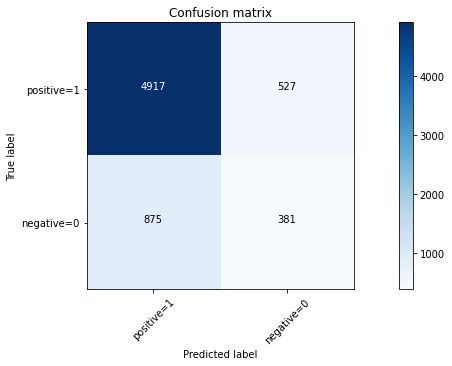

In [247]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_actual, y_predict, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(13,5))
plot_confusion_matrix(cnf_matrix, classes=['positive=1','negative=0'],normalize= False,  title='Confusion matrix')

## Evaluation with Logistic Regression

In [248]:
y_predict_lr = lrclf.predict(x_actual)

In [249]:
print(classification_report(y_actual, y_predict_lr))

              precision    recall  f1-score   support

           0       0.45      0.30      0.36      1256
           1       0.85      0.92      0.88      5444

    accuracy                           0.80      6700
   macro avg       0.65      0.61      0.62      6700
weighted avg       0.77      0.80      0.78      6700



Glossary: 0 for negative review and 1 for positive review.

According to the data above, 0 has very low score of precision, recall, f1-score and support due to less sampling data for negative review compare to positive ones and each unmatch classified data has huge impact on the score. Hence, the macro avg score has also low score of 0.65 becasue of the inbalance sampling data.
However, the score that matters the most is the weighted avg which balance out the weight of all the sampling data and generate the actual classifier score which is 0.8

Confusion matrix, without normalization
[[4982  462]
 [ 880  376]]


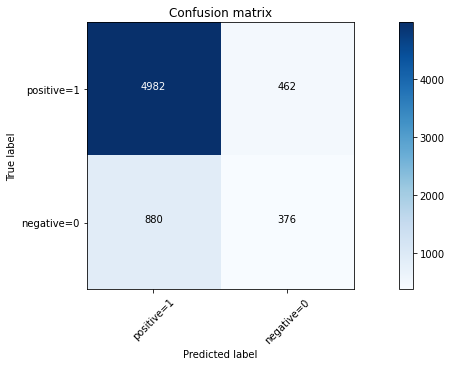

In [250]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_actual, y_predict_lr, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(13,5))
plot_confusion_matrix(cnf_matrix, classes=['positive=1','negative=0'],normalize= False,  title='Confusion matrix')

# Evaluation with Stacking Classifier model: LinearSVC and Logistic Regression

In [251]:
y_predict_model = model.predict(x_actual)

In [252]:
print(classification_report(y_actual, y_predict_model))

              precision    recall  f1-score   support

           0       0.43      0.32      0.37      1256
           1       0.85      0.90      0.88      5444

    accuracy                           0.79      6700
   macro avg       0.64      0.61      0.62      6700
weighted avg       0.77      0.79      0.78      6700



Confusion matrix, without normalization
[[4908  536]
 [ 855  401]]


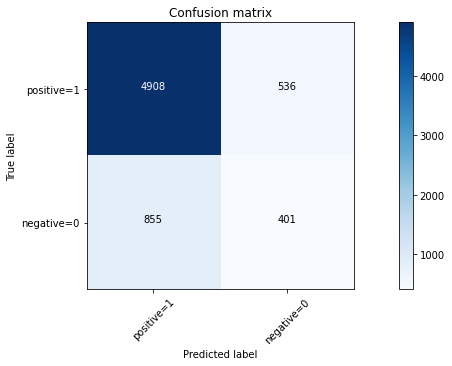

In [253]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_actual, y_predict_model, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(13,5))
plot_confusion_matrix(cnf_matrix, classes=['positive=1','negative=0'],normalize= False,  title='Confusion matrix')

# Evaluation with Stacking Classifier model: SGDClassifier and RidgeClassifier

In [254]:
y_predict_model1 = model1.predict(x_actual)
print(classification_report(y_actual, y_predict_model1))

              precision    recall  f1-score   support

           0       0.44      0.31      0.36      1256
           1       0.85      0.91      0.88      5444

    accuracy                           0.80      6700
   macro avg       0.64      0.61      0.62      6700
weighted avg       0.77      0.80      0.78      6700



Confusion matrix, without normalization
[[4946  498]
 [ 868  388]]


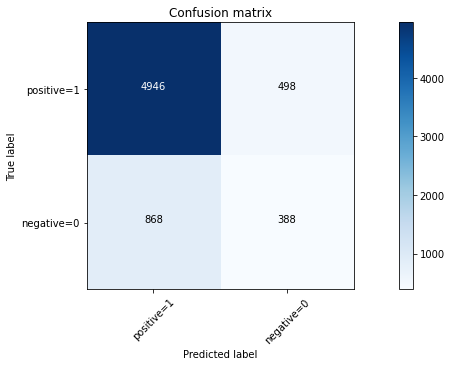

In [255]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_actual, y_predict_model1, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(13,5))
plot_confusion_matrix(cnf_matrix, classes=['positive=1','negative=0'],normalize= False,  title='Confusion matrix')

# Predict sentiment analysis result for all the crawled data

In [256]:
df3= pd.read_csv('auto_predict_crawl.csv')
df3.head()

,No,Review,Sentiment
0,1,This is one of the greatest films ever made......,1
1,2,There are a few wonderful courtroom dramas out...,1
2,3,When I was younger I thought 12 Angry Men was ...,0
3,4,A gripping single-location drama and one of th...,1
4,5,12 Angry Men (1957) **** (out of 4) A poor slu...,1


In [257]:
#df3['Predicted_Sentiment'] = df['review'].apply(lambda review: data_preprocessing(review))
df3['preprocessed_review'] = df3['Review'].apply(lambda review: data_preprocessing(review))
df3.head()

,No,Review,Sentiment,preprocessed_review
0,1,This is one of the greatest films ever made......,1,one greatest film ever made period much attrib...
1,2,There are a few wonderful courtroom dramas out...,1,wonderful courtroom drama anatomy murder kill ...
2,3,When I was younger I thought 12 Angry Men was ...,0,younger thought 12 angry men near perfect ense...
3,4,A gripping single-location drama and one of th...,1,gripping single location drama one best ever f...
4,5,12 Angry Men (1957) **** (out of 4) A poor slu...,1,12 angry men 1957 4 poor slum kid trial murder...


In [258]:
x_crawl = df3['preprocessed_review']
x_crawl = tfidf.transform(x_crawl)
x_crawl.shape

(2600, 93707)

In [259]:
y_crawl = lrclf.predict(x_crawl)

In [260]:
y_crawl

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [261]:
df3['Predicted_Sentiment'] = y_crawl
df3.head(10)

,No,Review,Sentiment,preprocessed_review,Predicted_Sentiment
0,1,This is one of the greatest films ever made......,1,one greatest film ever made period much attrib...,1
1,2,There are a few wonderful courtroom dramas out...,1,wonderful courtroom drama anatomy murder kill ...,1
2,3,When I was younger I thought 12 Angry Men was ...,0,younger thought 12 angry men near perfect ense...,1
3,4,A gripping single-location drama and one of th...,1,gripping single location drama one best ever f...,1
4,5,12 Angry Men (1957) **** (out of 4) A poor slu...,1,12 angry men 1957 4 poor slum kid trial murder...,1
5,6,"In a NYC courtroom, a first degree murder case...",1,nyc courtroom first degree murder case poor 18...,0
6,7,This movie came out of an era that I really lo...,1,movie came era really loved ensemble acting st...,1
7,8,Theater at its best is practically impossible ...,1,theater best practically impossible get film c...,1
8,9,A young ethnic kid from a rough area is up on ...,1,young ethnic kid rough area murder charge jury...,1
9,10,"I could go on, but I thought I'd stop there be...",1,could go thought stop summary line get big cla...,1


In [262]:
df3.to_csv('final.csv', encoding='utf-8', index=False)